<a href="https://colab.research.google.com/github/shekharkoirala/machinelearning_algorithms_analysis/blob/master/bestfitline/Finding_Best_Fit_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

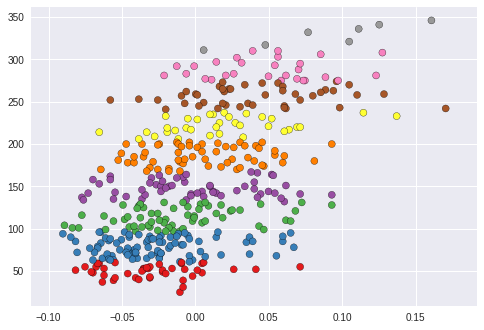

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Plot the training points
plt.scatter(diabetes_X_train,diabetes_y_train, c=diabetes_y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

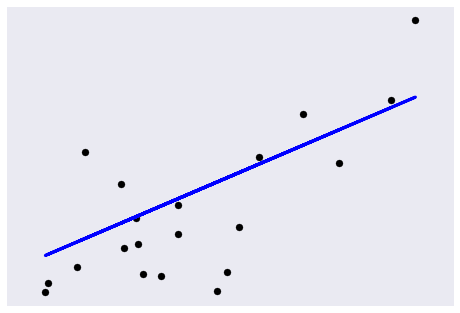

In [25]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
                      
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


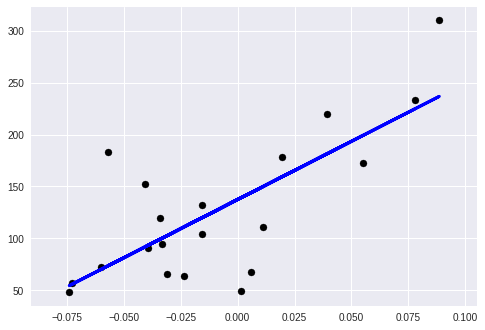

In [26]:
#############TUNINUG##########################
#ref: http://pavelbazin.com/post/linear-regression-hyperparameters/
def ordinary_least_squares(x, y):
    '''
    Find weights for a hypothesis of the form:
        w*x + b
    using ordinary least squares method where
    w defined as b0, b as b1 by convention.
    
    Params:
        x: training data values
        y: training data lables
    
    Returns:
        hypothesis function
    '''    
    xmean = np.mean(x)
    ymean = np.mean(y)

    m = len(x)
    
    numerator = 0
    denominator = 0

    for i in range(m):
        numerator += (x[i] - xmean) * (y[i] - ymean)
        denominator += (x[i] - xmean)**2
    
    b1 = numerator / denominator
    b0 = ymean - (b1 * xmean)
    
    # b1 and b0 are np arrays -> extract their actual values
    b = b0[0]
    w = b1[0]
    
    return lambda x: w*x + b

hypothesis = ordinary_least_squares(diabetes_X_test, diabetes_y_test)
prediction = hypothesis(diabetes_X_test)
prediction = prediction.reshape((20,))


plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, prediction, color='blue', linewidth=3)
